In [1]:
from sage.all import *
import numpy as np

In [2]:
F = GF(3)
F

Finite Field of size 3

In [3]:
def DesarguesSpread(F):
    lines = [[(F(0),u) for u in F]]
    for m in F:
        lines.append([(u, m*u) for u in F])
    return lines

In [4]:
def toInt(e):
    return list(F).index(e)

In [5]:
mubs = np.load('MUBS/3-1-desarguesian.npy')
mubs

array([[ 1.        +0.j ,  0.        +0.j ,  0.        +0.j ],
       [ 0.        +0.j ,  1.        +0.j ,  0.        +0.j ],
       [ 0.        +0.j ,  0.        +0.j ,  1.        +0.j ],
       [ 0.57735026+0.j ,  0.57735026+0.j ,  0.57735026+0.j ],
       [ 0.57735026+0.j , -0.28867513+0.5j, -0.28867513-0.5j],
       [ 0.57735026+0.j , -0.28867513-0.5j, -0.28867513+0.5j],
       [ 0.57735026+0.j ,  0.57735026+0.j ,  0.57735026+0.j ],
       [-0.28867513-0.5j,  0.57735026+0.j , -0.28867513+0.5j],
       [-0.28867513-0.5j, -0.28867513+0.5j,  0.57735026+0.j ],
       [ 0.57735026+0.j ,  0.57735026+0.j ,  0.57735026+0.j ],
       [-0.28867513+0.5j, -0.28867513-0.5j,  0.57735026+0.j ],
       [-0.28867513+0.5j,  0.57735026+0.j , -0.28867513-0.5j]],
      dtype=complex64)

In [6]:
mubs.shape

(12, 3)

In [7]:
omega = exp(2*pi*I / 3)
# omega = np.exp(2*np.pi*1j / 3)

In [8]:
X = np.array([
    [0, 0, 1],
    [1, 0, 0],
    [0, 1, 0]
])

Z = np.diag([omega**i for i in range(3)])

In [9]:
def D(a,b):
    return np.linalg.matrix_power(X, a) @ np.linalg.matrix_power(Z, b)

In [10]:
D(0,1) @ mubs[:3]

array([[(1+0j), 0j, 0j],
       [0, 0.5j*sqrt(3) + (-0.5+0j), 0],
       [0, 0, ((1+0j))*(1/2*I*sqrt(3) - 1/2)^2]], dtype=object)

In [11]:
D(1,1) @ mubs[6:9,0]

array([((-0.28867512941360474-0.5j))*(1/2*I*sqrt(3) - 1/2)^2,
       (0.5773502588272095+0j),
       ((0.25-0.14433756470680237j))*sqrt(3) + (0.14433756470680237+0.25j)],
      dtype=object)

In [12]:
def A_lines(x,y):
    bs = [y - m*x for m in F]
    lines = [[(x, u) for u in F]]
    for i, m in enumerate(F):
        line = [(x, m*x + bs[i]) for x in F]
        lines.append(line)
    return lines
    

In [13]:
A_lines(F(1), F(1))

[[(1, 0), (1, 1), (1, 2)],
 [(0, 1), (1, 1), (2, 1)],
 [(0, 0), (1, 1), (2, 2)],
 [(0, 2), (1, 1), (2, 0)]]

In [14]:
import matplotlib.pyplot as plt

def affineAx(F):
    d = F.order()
    fig, ax = plt.subplots(figsize=(3.5,3.5))

    ax.set_xticks(range(d))
    ax.set_yticks(range(d))

    # labels = ['$' + str(e) + '$' for e in F]
    # ax.set_xticklabels(labels)
    # ax.set_yticklabels(labels)
    
    return fig, ax

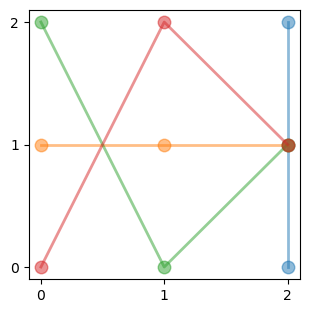

In [15]:
fig, ax = affineAx(F)

lines = A_lines(F(2), F(1))
for i, line in enumerate(lines):
    x, y = np.array(line).T
    x = [toInt(e) for e in x]
    y = [toInt(e) for e in y]

    alpha = 0.5
    # if i in [0,1,9,27]:
    #     alpha = 0.9

    ax.plot(
        x, y,
        marker='o',
        linewidth=2,
        markersize=9,
        alpha=alpha
    )

In [16]:
MUBS = [identity_matrix(3)]
for m in F:
    Bm = zero_matrix(SR, 3,3)
    for j, v in enumerate(F):
        for i, w in enumerate(F):
            pwr = ( (1/F(2))*w**2*m + v*w).trace()
            Bm[i,j] = exp(2*I*pi / 3)**Integer(lift(pwr)) * 1/sqrt(3)
    MUBS.append(Bm)

In [17]:
(MUBS[3][:,0]).n()

[                       0.577350269189626]
[-0.288675134594813 + 0.500000000000000*I]
[-0.288675134594813 + 0.500000000000000*I]

In [18]:
mubs

array([[ 1.        +0.j ,  0.        +0.j ,  0.        +0.j ],
       [ 0.        +0.j ,  1.        +0.j ,  0.        +0.j ],
       [ 0.        +0.j ,  0.        +0.j ,  1.        +0.j ],
       [ 0.57735026+0.j ,  0.57735026+0.j ,  0.57735026+0.j ],
       [ 0.57735026+0.j , -0.28867513+0.5j, -0.28867513-0.5j],
       [ 0.57735026+0.j , -0.28867513-0.5j, -0.28867513+0.5j],
       [ 0.57735026+0.j ,  0.57735026+0.j ,  0.57735026+0.j ],
       [-0.28867513-0.5j,  0.57735026+0.j , -0.28867513+0.5j],
       [-0.28867513-0.5j, -0.28867513+0.5j,  0.57735026+0.j ],
       [ 0.57735026+0.j ,  0.57735026+0.j ,  0.57735026+0.j ],
       [-0.28867513+0.5j, -0.28867513-0.5j,  0.57735026+0.j ],
       [-0.28867513+0.5j,  0.57735026+0.j , -0.28867513-0.5j]],
      dtype=complex64)

In [19]:
def proj(v):
    return v * transpose(conjugate(v))

In [20]:
def npProj(v):
    d = len(v)
    return np.kron(v.reshape((d,1)), v.conj())

In [21]:
def A(x, y, mubs):
    d = F.order()
    bs = [x] + [y - m*x for m in F]
    bi = [toInt(b) for b in bs]
    
    op = np.zeros((d,d), dtype='complex64')
    for k in range(d + 1):
        B = mubs[3*k:3*(k+1),:]
        p = npProj(B[:,bi[k]])
        op += p
        
    return op - identity_matrix(d)

In [22]:
op = A(F(1), F(1), mubs).round()

In [23]:
# sanity check
for x in F:
    for y in F:
        op = A(x,y, mubs).round()
        if op.trace() != 1:
            print(x,y)
            raise Exception('Oops! Not unit trace')
        if not np.all(op == op.conj().T):
            print(x,y)
            raise Exception('Oops! Not self-adjoint')
print('All point operators are self adjoint and unit trace!')

All point operators are self adjoint and unit trace!


In [24]:
A(F(1), F(1), mubs).round()

array([[-0.+0.j,  0.+0.j, -0.+1.j],
       [ 0.+0.j,  1.+0.j, -0.+0.j],
       [-0.-1.j, -0.+0.j, -0.+0.j]])

In [25]:
def Wigner(rho, x, y):
    d = F.order()
    return (rho @ A(x, y, mubs)).trace() / d

In [26]:
def WignerMatrix(rho):
    W = np.zeros((3,3))
    for i, x in enumerate(F):
        for j, y in enumerate(F):
            W[i,j] = np.real(Wigner(rho, x, y))
    return np.rot90(W)

In [27]:
s1 = np.array(proj(MUBS[0][:,0]).n())
s2 = np.array(proj(MUBS[-1][:,0]).n())
s3 = np.array(proj((MUBS[0][:,0] + MUBS[0][:,1]) / sqrt(2)).n())
states = [s1,s2,s3]

In [28]:
# sum should be equal to 1
for s in states:
    print(WignerMatrix(s1).sum())

0.9999996423721313
0.9999996423721313
0.9999996423721313


In [29]:
WignerMatrix(s2).round(3)

array([[-0.   ,  0.333, -0.   ],
       [-0.   , -0.   ,  0.333],
       [ 0.333, -0.   , -0.   ]])

In [30]:
import matplotlib as mpl
from matplotlib import cm

def plotWigner(M, rotate=True):
    if rotate:
        M = np.rot90(M, -1)

    n = np.size(M)
    xpos, ypos = np.meshgrid(range(M.shape[0]), range(M.shape[1]))
    xpos = xpos.T.flatten() - 0.5
    ypos = ypos.T.flatten() - 0.5
    zpos = np.zeros(n)
    dx = dy = 0.8 * np.ones(n)
    dz = np.real(M.flatten())

    z_min = min(dz)
    z_max = max(dz)
    if z_min == z_max:
        z_min -= 0.1
        z_max += 0.1

    norm = mpl.colors.Normalize(z_min, z_max)
    cmap = mpl.colormaps['viridis']
    colors = cmap(norm(dz))

    fig = plt.figure(figsize=(4.5, 3.5))
    # ax = fig.add_subplot(projection='3d', azim=145, elev=35)
    ax = fig.add_subplot(projection='3d', azim=-35, elev=35)

    ax.bar3d(xpos, ypos, zpos, dx, dy, dz, color=colors)

    # x axis
    ax.axes.xaxis.set_major_locator(plt.IndexLocator(1, -0.5))

    # y axis
    ax.axes.yaxis.set_major_locator(plt.IndexLocator(1, -0.5))
    # ax.invert_yaxis()

    # z axis
    ax.axes.zaxis.set_major_locator(plt.IndexLocator(1, 0.5))
    ax.set_zlim3d([min(z_min, 0), z_max])

    cax, kw = mpl.colorbar.make_axes(ax, shrink=.75, pad=.1)
    mpl.colorbar.ColorbarBase(cax, cmap=cmap, norm=norm)

    return fig, ax

In [39]:
plotWigner(WignerMatrix(s3))

(<Figure size 450x350 with 2 Axes>, <Axes3D: >)

In [34]:
import matplotlib

matplotlib.use("pgf")
matplotlib.rcParams.update({
    "pgf.texsystem": "pdflatex",
    'font.family': 'serif',
    'text.usetex': True,
    'pgf.rcfonts': False,
})

In [40]:
plt.savefig('../imgs/wigner-desargues-3-1-s3.pgf')

In [43]:
WignerMatrix(s3)[:,2].sum()

-5.960464477539063e-08